## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning and Consistenct checks
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Model Performance Check
#### 6. Reflection

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Create path
path = r'C:\Users\mngit\OneDrive\Data Analytics\Project Excercises\Achievement 6\World Happiness Report' 

In [4]:
#Import happiness Data set
df_happiness = pd.read_csv(os.path.join(path, '02 Data','Wrangled Data', 'happiness_wrangled.csv'), index_col = 0)

### 2. Data Cleaning and Consistency checks

In [5]:
#check original shape
df_happiness.shape

(785, 11)

In [6]:
#check columns
df_happiness.columns

Index(['Country', 'Year', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom to make life choices',
       'Lack of Corruption', 'Donations to Charity'],
      dtype='object')

In [7]:
#Check for duplicates
dups = df_happiness.duplicated()

In [8]:
# Check for missing values

df_happiness.isnull().sum()


Country                         0
Year                            0
Region                          0
Happiness Rank                  0
Happiness Score                 0
Economy (GDP per Capita)        0
Social Support                  0
Health (Life Expectancy)        0
Freedom to make life choices    0
Lack of Corruption              0
Donations to Charity            0
dtype: int64

### 3. Data prep for regression analysis 

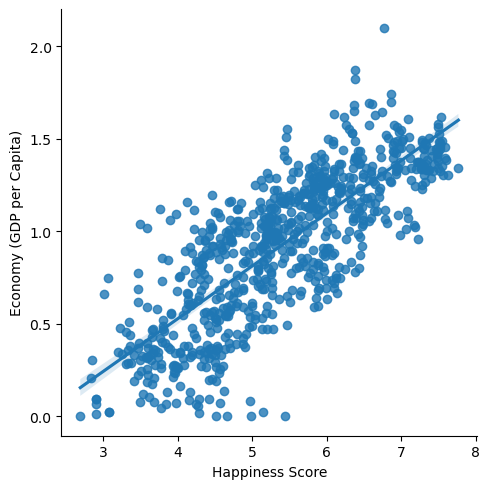

In [9]:
# Create a scatterplot for the "Happiness Score" and "Economy(GDP per Capita)" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Economy (GDP per Capita)', data = df_happiness)

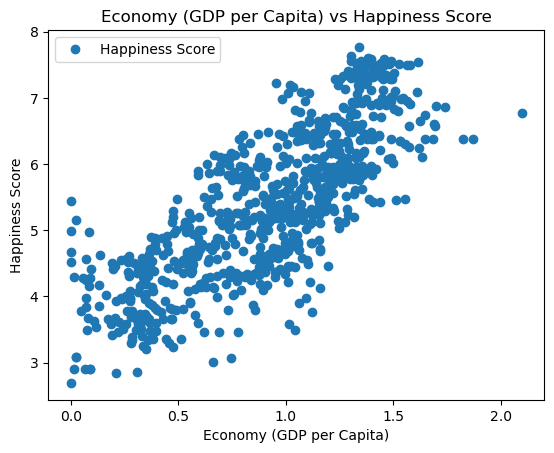

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_happiness.plot(x = 'Economy (GDP per Capita)', y='Happiness Score',style='o') 
plt.title('Economy (GDP per Capita) vs Happiness Score')  
plt.xlabel('Economy (GDP per Capita)')  
plt.ylabel('Happiness Score')  
plt.show()

## Hypothesis : ' Economic strength of a country affects its peoples well-being, therefore if a country is wealthy, it is likely to have a happier population’.

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_happiness['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df_happiness['Happiness Score'].values.reshape(-1,1)

In [12]:
X

array([[0.32  ],
       [0.382 ],
       [0.401 ],
       [0.332 ],
       [0.35  ],
       [0.879 ],
       [0.955 ],
       [0.996 ],
       [0.916 ],
       [0.947 ],
       [0.939 ],
       [1.053 ],
       [1.092 ],
       [0.979 ],
       [1.002 ],
       [0.758 ],
       [0.847 ],
       [0.858 ],
       [0.73  ],
       [0.9825],
       [1.054 ],
       [1.151 ],
       [1.185 ],
       [1.073 ],
       [1.092 ],
       [0.768 ],
       [0.861 ],
       [0.901 ],
       [0.816 ],
       [0.85  ],
       [1.334 ],
       [1.444 ],
       [1.484 ],
       [1.34  ],
       [1.372 ],
       [1.337 ],
       [1.45  ],
       [1.487 ],
       [1.341 ],
       [1.376 ],
       [1.024 ],
       [1.124 ],
       [1.154 ],
       [1.024 ],
       [1.043 ],
       [1.324 ],
       [1.44  ],
       [1.488 ],
       [1.338 ],
       [1.362 ],
       [0.398 ],
       [0.542 ],
       [0.587 ],
       [0.532 ],
       [0.562 ],
       [1.032 ],
       [1.131 ],
       [1.157 ],
       [1.039 

In [13]:
y

array([[3.575],
       [3.36 ],
       [3.794],
       [3.632],
       [3.203],
       [4.959],
       [4.655],
       [4.644],
       [4.586],
       [4.719],
       [5.605],
       [6.355],
       [5.872],
       [5.295],
       [5.211],
       [4.033],
       [3.866],
       [3.795],
       [3.795],
       [5.323],
       [6.574],
       [6.65 ],
       [6.599],
       [6.388],
       [6.086],
       [4.35 ],
       [4.36 ],
       [4.376],
       [4.321],
       [4.559],
       [7.284],
       [7.313],
       [7.284],
       [7.272],
       [7.228],
       [7.2  ],
       [7.119],
       [7.006],
       [7.139],
       [7.246],
       [5.212],
       [5.291],
       [5.234],
       [5.201],
       [5.208],
       [5.96 ],
       [6.218],
       [6.087],
       [6.105],
       [6.199],
       [4.694],
       [4.643],
       [4.608],
       [4.5  ],
       [4.456],
       [5.813],
       [5.802],
       [5.569],
       [5.483],
       [5.323],
       [6.937],
       [6.929],
       [

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

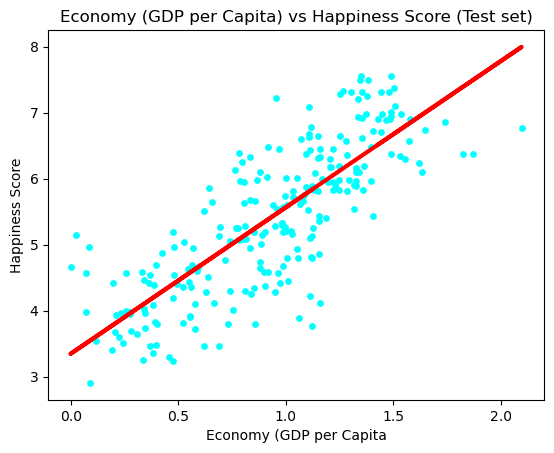

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='cyan', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy (GDP per Capita) vs Happiness Score (Test set)')
plot_test.xlabel('Economy (GDP per Capita')
plot_test.ylabel('Happiness Score')

plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'Linear_Regression.png')) #Export Linear Regression

plot_test.show()



#### The line fits well, covering majority of the data points - it is clear that there is a positive relationship - As Economy increases so does the Happiness Score

### 5. Check the model performance statistics— Slope, MSE and R

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.21827667]]
Mean squared error:  0.4720115162214576
R2 score:  0.6207893849529809


In [25]:
y_predicted

array([[5.83165483],
       [5.19279115],
       [3.91506379],
       [5.53218748],
       [5.02198385],
       [5.56989818],
       [4.57832851],
       [3.39820532],
       [5.63644648],
       [6.55037647],
       [4.598293  ],
       [5.80947206],
       [5.53218748],
       [6.15995978],
       [6.35294985],
       [5.58098957],
       [5.055258  ],
       [5.61870027],
       [6.84318899],
       [5.82056345],
       [3.34718496],
       [6.08010182],
       [4.51178021],
       [4.66040475],
       [3.95721104],
       [5.34585224],
       [5.92260417],
       [5.62757338],
       [5.68524857],
       [3.84407893],
       [5.08631387],
       [7.39332161],
       [6.04904594],
       [5.07965904],
       [4.50734366],
       [5.79172585],
       [3.86404342],
       [6.44168091],
       [4.11692696],
       [7.99669286],
       [5.57433474],
       [4.1612925 ],
       [5.15064389],
       [5.83387311],
       [4.55836402],
       [6.96963076],
       [5.37912639],
       [6.998

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.888,5.831655
1,4.949,5.192791
2,4.571,3.915064
3,4.677,5.532187
4,4.015,5.021984
5,5.211,5.569898
6,3.916,4.578329
7,5.151,3.398205
8,5.813,5.636446
9,7.313,6.550376


### 6.Reflection
#### Based on the reggression line, MSE, R2 Score and the comparison dataframe, the model seems somewhat accurate, however having a 62% accuracy  indicates that although strength of the Economy is an important factor, it would have to be coupled with other factors to earn a high Happiness Score.
#### In addition, GDP score may be biased as it does not capture welfare or human well-being also, GDP may not be a strong basis to predict economic growth in times of high uncertainty. As international accounting standards are slow to change and require international consensus, GDP is slow to reflect changes in the world and therefore may not be the best predictor variable